# Learn VGG16 architecture from scratch with Pytorch and Tensorflow

This is my first model (VGG16 architecture) in Pytorch and in Tensorflow

The link of the paper is : https://arxiv.org/pdf/1409.1556.pdf

So we get the following picture of the architecture :

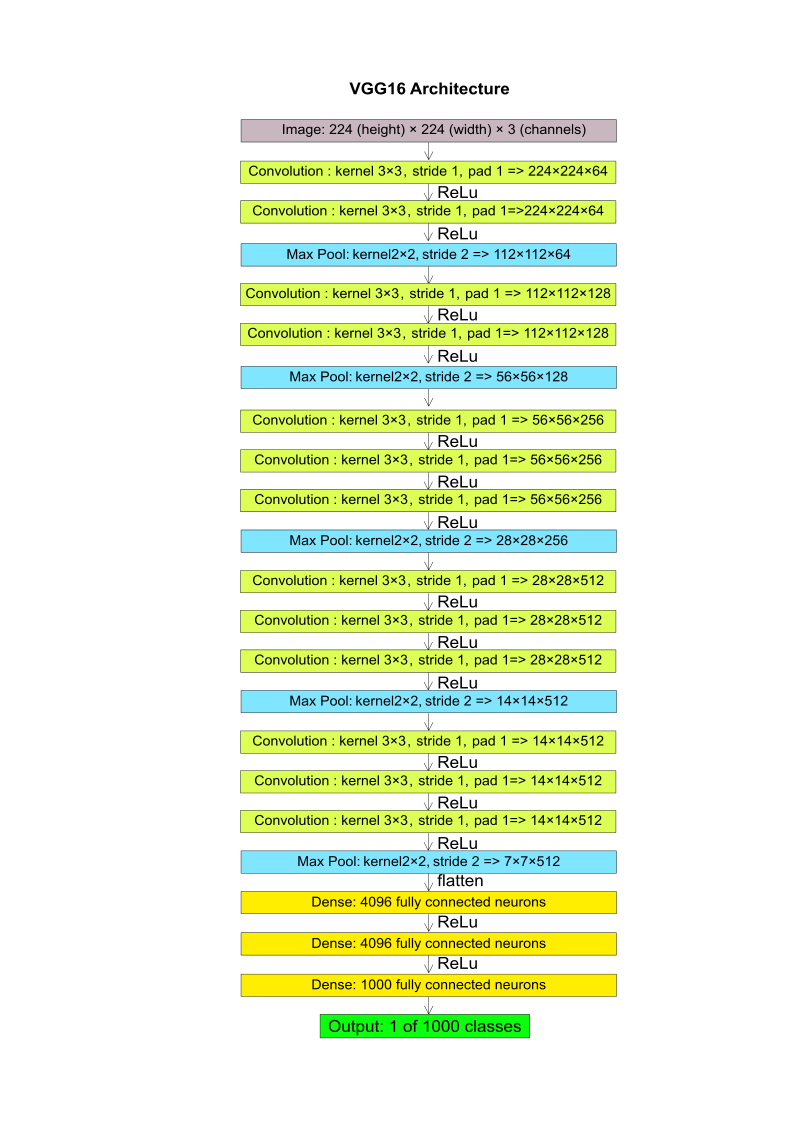

# The number of Prameters

Here is table which gives us the number of parameters:

Weights calculation for Convolutional layers:  (n x m x l+1)*k         

Where 

k: feature maps as input

l: feature maps as output

n x m is the filter size

1 for the bias

Weights calculation for Fully-connected layers:  (n+1)*m

| Layers      | Size         |Memory           |weights                          |
| ----------- | -----------  |   -----------   |-----------                      | 
| INPUT       | [224x224x3]  |224x224x3=150K   |0                                |
| CONV3-64    | [224x224x64] |224x224x64=3.2M  |(3x3x3+1)x64 = 1,792             |
| CONV3-64    | [224x224x64] |224x224x64=3.2M  |(3x3x64+1)x64 = 36,928           |
| POOL2       | [112x112x64] |112x112x64=800K  |0                                |  
| CONV3-128   | [112x112x128]|112x112x128=1.6M |(3x3x64+1)x128 = 73,856          |
| CONV3-128   | [112x112x128]|112x112x128=1.6M |(3x3x128+1)x128 = 147,584        |
| POOL2       | [56x56x128]  |56x56x128=400K   |0                                |
| CONV3-256   | [56x56x256]  |56x56x256=800K   |(3x3x128+1)x256 = 295,128        |
| CONV3-256   | [56x56x256]  |56x56x256=800K   |(3x3x256+1)x256 = 590,080        |
| CONV3-256   | [56x56x256]  |56x56x256=800K   |(3x3x256+1)x256 = 590,080        |
| POOL2       | [28x28x256]  |28x28x256=200K   |0                                |
| CONV3-512   | [28x28x512]  |28x28x512=400K   |(3x3x256+1)x512 = 1,180,160      |
| CONV3-512   | [28x28x512]  |28x28x512=400K   |(3x3x512+1)x512 = 2,359,808      |
| CONV3-512   | [28x28x512]  |28x28x512=400K   |(3x3x512+1)x512 = 2,359,808      |
| POOL2       | [14x14x512]  |14x14x512=100K   |0                                |
| CONV3-512   | [14x14x512]  |14x14x512=100K   |(3x3x512+1)x512 = 2,359,808      |
| CONV3-512   | [14x14x512]  |14x14x512=100K   |(3x3x512+1)x512 = 2,359,808      |
| CONV3-512   | [14x14x512]  |14x14x512=100K   |(3x3x512+1)x512 = 2,359,808      |
| POOL2       | [7x7x512]    |7x7x512=25K      |0                                |
| FC          | [1x1x4096]   |4096             |(7x7x512 + 1) x4096 = 102,764,544|
| FC          | [1x1x4096]   |4096             |(4096 + 1) x 4096 = 16,781,312   |
| FC          | [1x1x1000]   |1000             |(4096 + 1) x 1000 = 4,097,000    |

TOTAL memory: 24M * 4 bytes ~= 93MB / image (only forward! ~*2 for bwd)

TOTAL params: 138M parameters

# With Pytorch

In [1]:
import torch
import torch.nn as nn
from torchsummary import summary

In [2]:
print(f"PyTorch version: {torch.__version__}")

PyTorch version: 1.10.0


In [3]:
class VGG16(nn.Module):
    def __init__(self):
 
        super(VGG16 , self).__init__()

        self.conv1 = nn.Conv2d(in_channels=3 , out_channels= 64 , kernel_size=(3,3) , stride=(1,1) , padding=(1,1))
        self.conv2 = nn.Conv2d(in_channels=64 , out_channels= 64 , kernel_size=(3,3) , stride=(1,1), padding=(1,1))

        self.conv3 = nn.Conv2d(in_channels=64 , out_channels= 128 , kernel_size=(3,3) , stride=(1,1), padding=(1,1))
        self.conv4 = nn.Conv2d(in_channels=128 , out_channels= 128 , kernel_size=(3,3) , stride=(1,1), padding=(1,1))

        self.conv5 = nn.Conv2d(in_channels=128 , out_channels= 256 , kernel_size=(3,3) , stride=(1,1), padding=(1,1))
        self.conv6 = nn.Conv2d(in_channels=256 , out_channels= 256 , kernel_size=(3,3) , stride=(1,1), padding=(1,1))

        self.conv7 = nn.Conv2d(in_channels=256 , out_channels= 512 , kernel_size=(3,3) , stride=(1,1), padding=(1,1))
        self.conv8 = nn.Conv2d(in_channels=512 , out_channels= 512 , kernel_size=(3,3) , stride=(1,1), padding=(1,1))

        self.maxPool = nn.MaxPool2d(kernel_size=(2,2) , stride=(2,2))

        self.fc1 = nn.Linear(in_features=25088 , out_features=4096)
        self.fc2 = nn.Linear(in_features=4096 , out_features=4096)
        self.fc3 = nn.Linear(in_features=4096 , out_features=1000)

        self.relu = nn.ReLU(inplace = True)
        self.softmax = nn.Softmax(dim = 1)

    def forward(self, x):

        x = self.conv1(x)
        x = self.relu(x)
      
        x = self.conv2(x)
        x = self.relu(x)

        x = self.maxPool(x)
        
        x = self.conv3(x)
        x = self.relu(x)

        x = self.conv4(x)
        x = self.relu(x)

        x = self.maxPool(x)

        x = self.conv5(x)
        x = self.relu(x)

        x = self.conv6(x)
        x = self.relu(x)

        x = self.conv6(x)
        x = self.relu(x)

        x = self.maxPool(x)

        x = self.conv7(x)
        x = self.relu(x)

        x = self.conv8(x)
        x = self.relu(x)

        x = self.conv8(x)
        x = self.relu(x)

        x = self.maxPool(x)

        x = self.conv8(x)
        x = self.relu(x)

        x = self.conv8(x)
        x = self.relu(x)

        x = self.conv8(x)
        x = self.relu(x)

        x = self.maxPool(x)

        x = x.reshape(x.shape[0] , -1)

        x = self.fc1(x)
        x = self.relu(x)

        x = self.fc2(x)
        x = self.relu(x)

        x = self.fc3(x)
        x = self.softmax(x)

        return x

In [4]:
dev = torch.device("cuda") 

model_1 = VGG16().to(dev)
print(summary(model_1,(3,224,224)))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
              ReLU-2         [-1, 64, 224, 224]               0
            Conv2d-3         [-1, 64, 224, 224]          36,928
              ReLU-4         [-1, 64, 224, 224]               0
         MaxPool2d-5         [-1, 64, 112, 112]               0
            Conv2d-6        [-1, 128, 112, 112]          73,856
              ReLU-7        [-1, 128, 112, 112]               0
            Conv2d-8        [-1, 128, 112, 112]         147,584
              ReLU-9        [-1, 128, 112, 112]               0
        MaxPool2d-10          [-1, 128, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]         295,168
             ReLU-12          [-1, 256, 56, 56]               0
           Conv2d-13          [-1, 256, 56, 56]         590,080
             ReLU-14          [-1, 256,

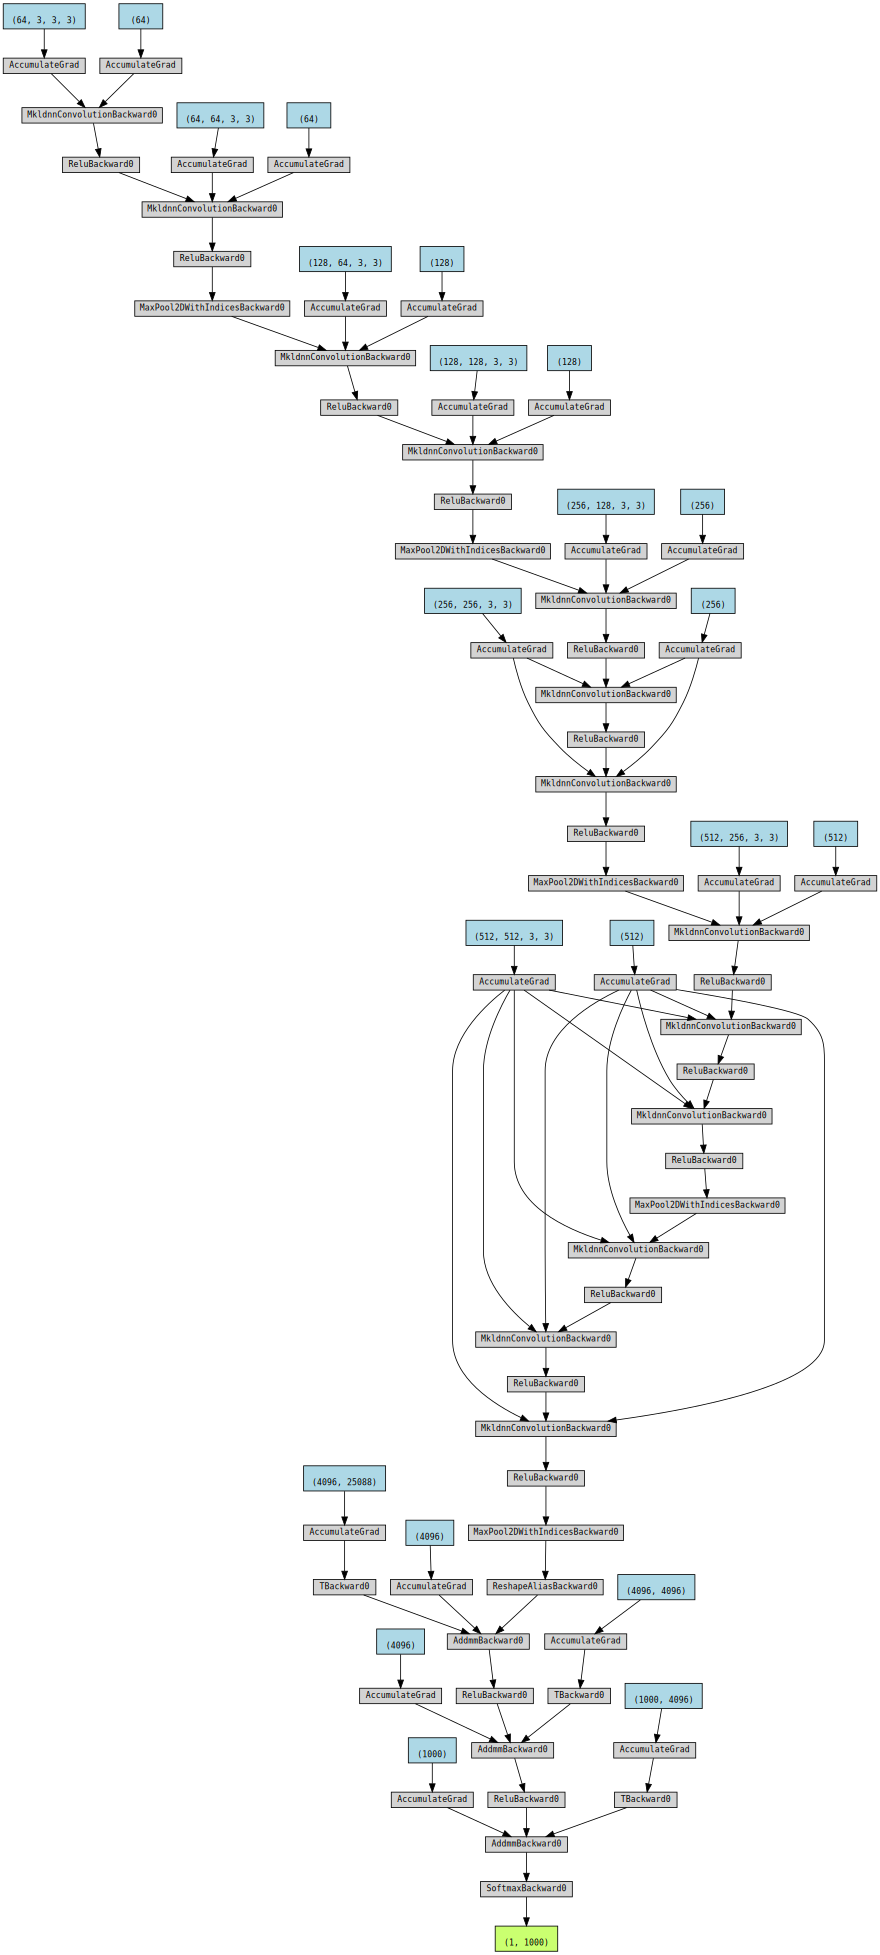

In [5]:
from torchviz import make_dot

x = torch.randn(1, 3, 224, 224)

model_1_cpu = VGG16()
model_1_cpu_out = model_1_cpu(x)

#g = make_dot(out, params=None)
#g.view()
make_dot(model_1_cpu_out, params = None)

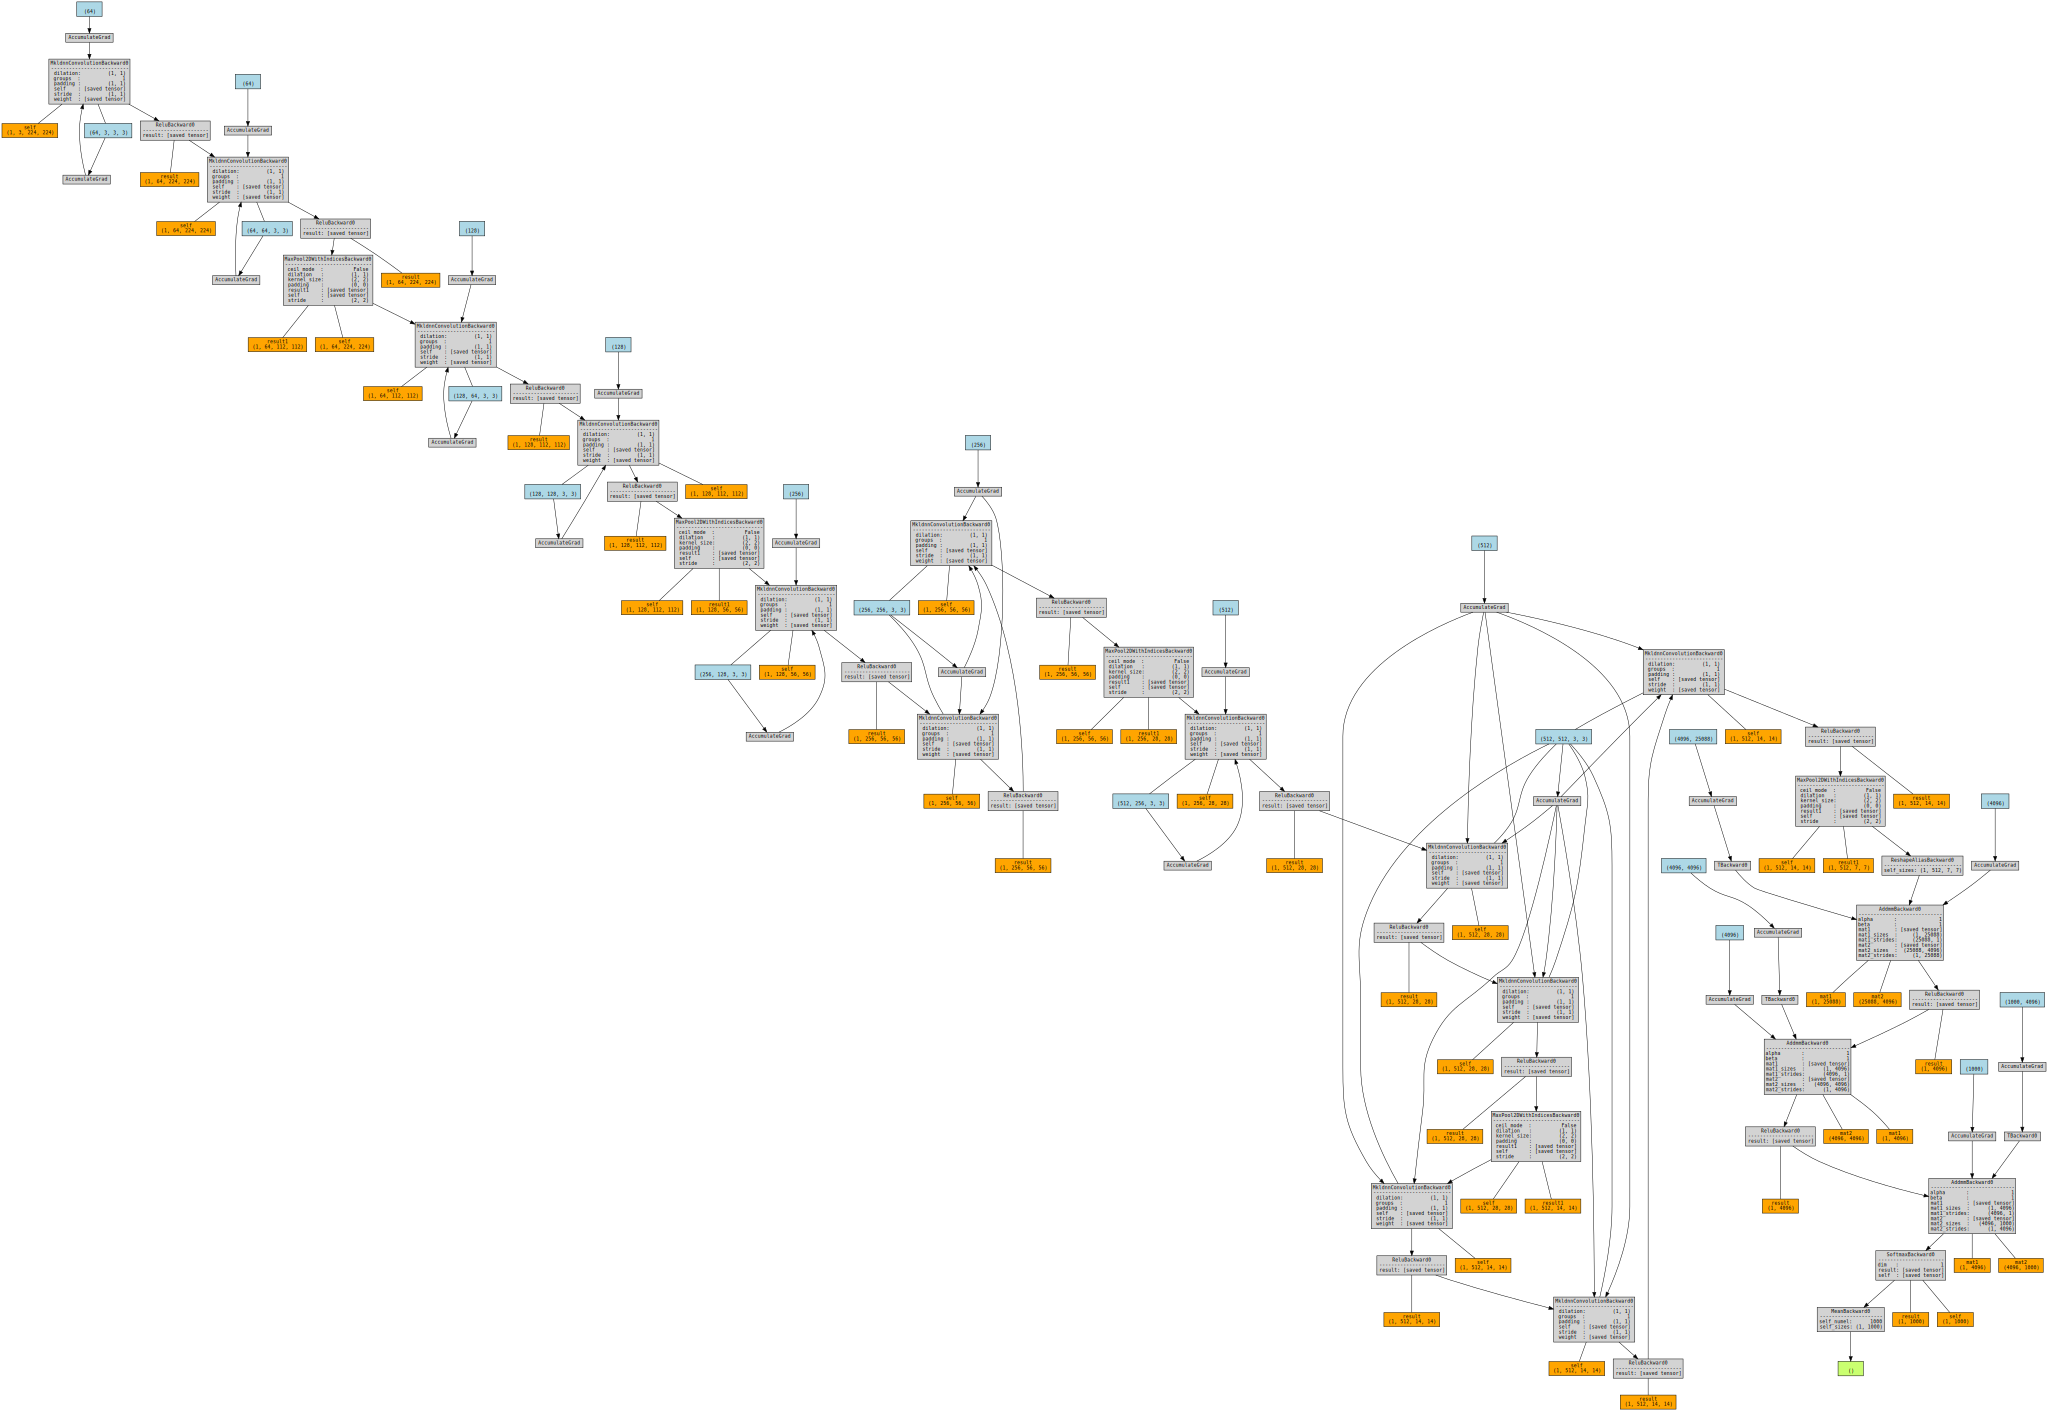

In [6]:
make_dot(model_1_cpu_out.mean(), params = None, show_attrs = True, show_saved = True)

# With Tensorflow

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPooling2D, Dense, Flatten

In [8]:
print(f"Tensor Flow Version: {tf.__version__}")

Tensor Flow Version: 2.6.0


In [9]:
class VGG16_model_tf_1(Sequential):
    def __init__(self, input_layer):
        super().__init__()
        
        self.add(Conv2D(filters = 64 , kernel_size = (3, 3), strides = (1, 1), padding = 'same', input_shape = input_layer))
        self.add(Activation('relu')) 
            
        self.add(Conv2D(filters = 64 , kernel_size = (3,3), strides = (1, 1), padding = 'same'))    
        self.add(Activation('relu'))  
        
        self.add(MaxPooling2D(pool_size = (2,2) , strides = (2, 2)))
        
        self.add(Conv2D(filters=128 , kernel_size = (3,3), strides = (1, 1), padding = 'same'))
        self.add(Activation('relu'))
 
        self.add(Conv2D(filters=128 , kernel_size = (3,3) , strides = (1, 1), padding = 'same'))
        self.add(Activation('relu'))
 
        self.add(MaxPooling2D(pool_size = (2,2) , strides = (2,2)))
        
        self.add(Conv2D(filters=256 , kernel_size=(3,3) , strides=(1, 1), padding = 'same'))
        self.add(Activation('relu'))
        
        self.add(Conv2D(filters=256 , kernel_size=(3,3) , strides=(1, 1), padding = 'same'))
        self.add(Activation('relu'))

        self.add(Conv2D(filters=256 , kernel_size=(3,3) , strides=(1, 1), padding = 'same'))
        self.add(Activation('relu'))

        self.add(MaxPooling2D(pool_size=(2,2) , strides=(2,2)))

        self.add(Conv2D(filters=512 , kernel_size=(3,3) , strides=(1, 1), padding = 'same'))
        self.add(Activation('relu'))

        self.add(Conv2D(filters=512 , kernel_size=(3,3) , strides=(1, 1), padding = 'same'))
        self.add(Activation('relu'))

        self.add(Conv2D(filters=512 , kernel_size=(3,3) , strides=(1, 1), padding = 'same'))
        self.add(Activation('relu'))

        self.add(MaxPooling2D(pool_size=(2,2) , strides=(2,2)))

        self.add(Conv2D(filters=512 , kernel_size=(3,3) , strides=(1, 1), padding = 'same'))
        self.add(Activation('relu'))

        self.add(Conv2D(filters=512 , kernel_size=(3,3) , strides=(1, 1), padding = 'same'))
        self.add(Activation('relu'))

        self.add(Conv2D(filters=512 , kernel_size=(3,3) , strides=(1, 1), padding = 'same'))
        self.add(Activation('relu'))

        self.add(MaxPooling2D(pool_size=(2,2) , strides=(2,2)))

        #Passing it to a Fully Connected layer
        self.add(Flatten())
        
        self.add(Dense(units=4096))    
        self.add(Activation('relu'))
        
        self.add(Dense(units=4096))
        self.add(Activation('relu'))
        
        self.add(Dense(units = 1000))
        self.add(Activation('softmax'))  

In [10]:
input_layer = (224 , 224 , 3)
model_2 = VGG16_model_tf_1(input_layer = input_layer)

In [11]:
model_2.summary()

Model: "vg_g16_model_tf_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
activation (Activation)      (None, 224, 224, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
activation_1 (Activation)    (None, 224, 224, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
activation_2 (Activation)    (None, 112, 112, 128

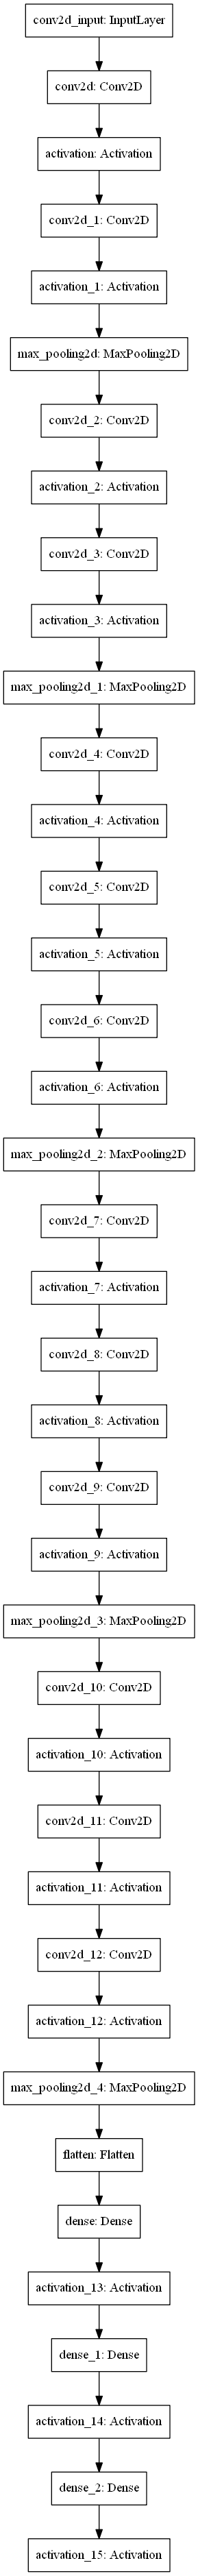

In [12]:
tf.keras.utils.plot_model(model_2)